# <center>HOUSE PRICES</center>

<img src='https://storage.googleapis.com/kaggle-competitions/kaggle/5407/logos/front_page.png'>

# Load packages

In order to be able to manipulate the data, we need to import the necessary python libraries:
- Numpy: This library offers mathematical functions to operatore on arrays. We will need it in order to manipulate multi-dimensional arrays and matrices.
- Pandas: This library offers offers data structures and operations for manipulating numerical tables and time series. We will need it in order to manipulate and analyse data. 
- Matplotlib: This library offers an object-oriented API for embedding plots into applications. We will need it in order to visualize some data graphs and functions.
- Scikit-learn: This library offers various machine learning algorithms. We will need it in order to train the data using a linear regression model

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib
import keras
import seaborn as sns
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load datas

In [76]:
train = pd.read_csv('train.csv')
print('Shape of the train data with all features:', train.shape)
#train = train.select_dtypes(exclude=['object'])
print("")
print('Shape of the train data with numerical features:', train.shape)
train.drop('Id',axis = 1, inplace = True)
#train.fillna(0,inplace=True)

test = pd.read_csv('test.csv')
#test = test.select_dtypes(exclude=['object'])
ID = test.Id
#test.fillna(0,inplace=True)
test.drop('Id',axis = 1, inplace = True)

Shape of the train data with all features: (1460, 81)

Shape of the train data with numerical features: (1460, 81)


# Vizualise datas

In [77]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

In [78]:
quantitative

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [79]:
qualitative

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

There are 1460 instances of training data and 1460 of test data. Total number of attributes equals 81, of which 36 is quantitative, 43 categorical + Id and SalePrice.

**Quantitative:** 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

**Qualitative:** Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities,

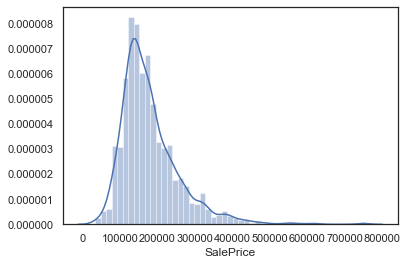

In [80]:
#histogram
sns.distplot(train['SalePrice']);

In [81]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


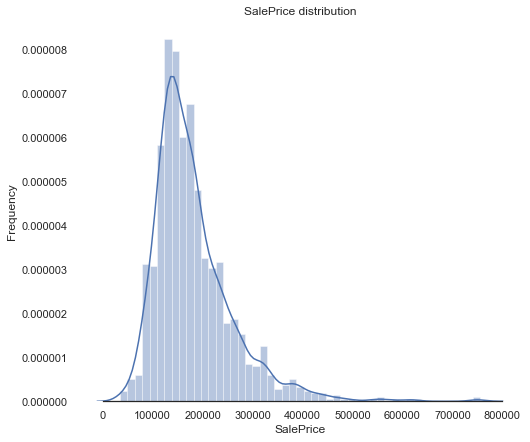

In [82]:
#Before the normalisation
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train['SalePrice'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

# Deleting the more visibly obvious outliers
# 4500 exceeds the central tendecy of of the houses in that price point and all the houses in the dataset
# will deal with more subtle outlers later.
train = train[train.GrLivArea < 4500]
train.reset_index(drop=True, inplace=True)

> The graph shows that our data is skewed to the right.

This is to make sure that SalesPrice values are distributed normaly using function log1p which  applies log(1+x) to all elements of the column which fixes the skeweness of the distribution.


 mu = 12.02 and sigma = 0.40



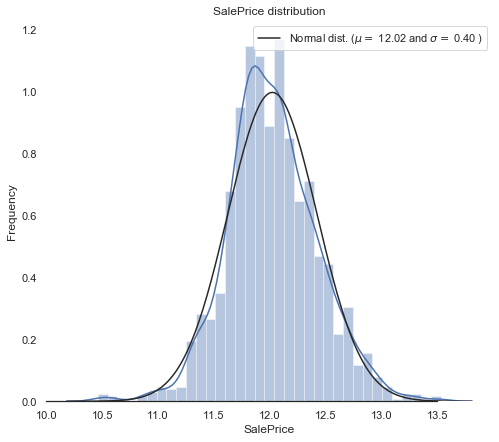

In [83]:
#We use the numpy fuction log1p 
train["SalePrice"] = np.log1p(train["SalePrice"])
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)

plt.show()

> The graph shows that our data now looks more normal

In [84]:
y = train.SalePrice.reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

# concatinate the train and the test set as features for tranformation to avoid mismatch
features = pd.concat([train_features, test_features]).reset_index(drop=True)
print('Features size:', features.shape)

Features size: (2917, 79)


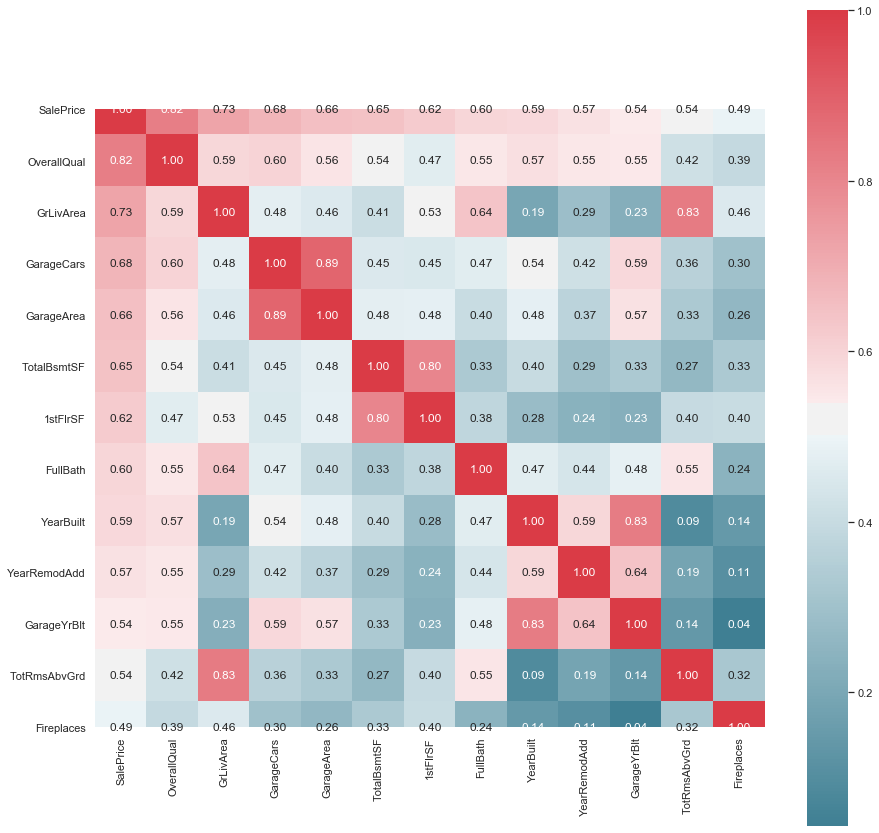

In [85]:
corr = train[train.SalePrice>1].corr()
top_corr_cols = corr[abs((corr.SalePrice)>=.46)].SalePrice.sort_values(ascending=False).keys()
top_corr = corr.loc[top_corr_cols, top_corr_cols]
plt.figure(figsize=(15, 15))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", square=True)
plt.show()

From this plot we can draw the conclusion that:
    - OverallQual is important
    - GrLivArea is also important
    - TotalBsmtSF is important
    - GarageCars and GarageArea are two important features but we drop GarageArea since it is more or less the same information as GarageCars
    - TotalBsmtSF and 1stFlrSF are also more or less the same so we drop 1StFlrSF
    - TotRmsAbvGrd and GrLivArea are also strongly correlated to let's drop TotRmsAbvGrd
 
 Let's scatterplot these important features.

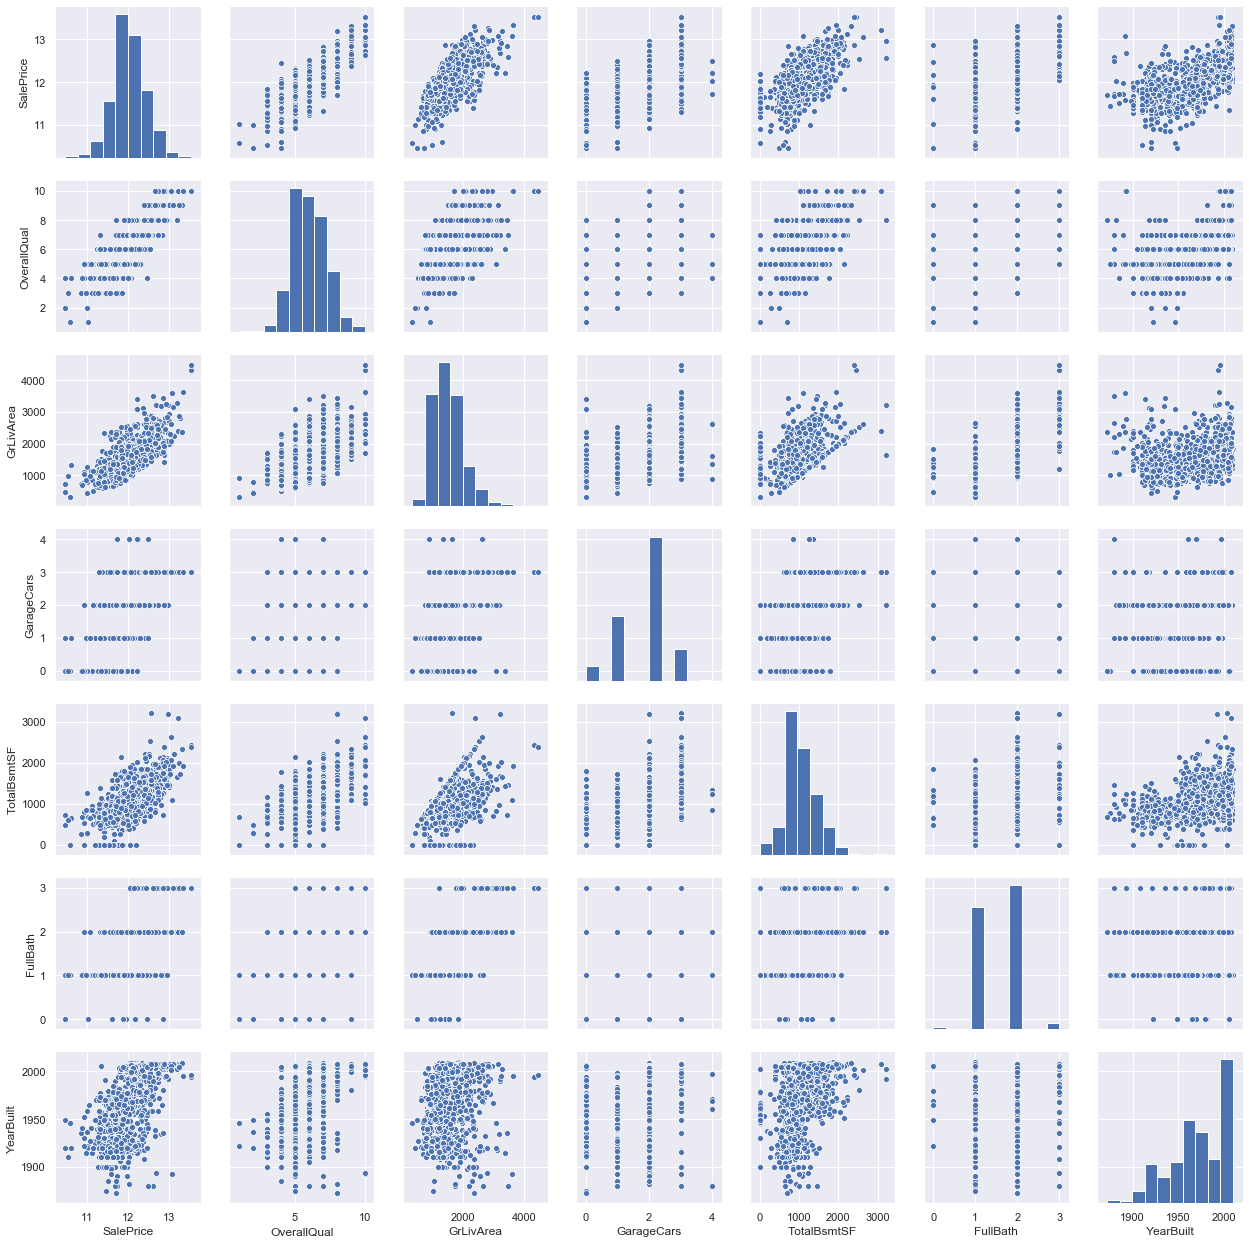

In [86]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], height = 2.5)
plt.show();

The basement area and total living area seems to have similarities their saleprice plot looks almost identical, let's drop basement area.

Maybe also remove year built data since this data can be tricky to use.

# Clean datas and generate new ones

We now start the process of preparing our features, we first find, the percentage of missing data in each column and we determine whether the threshold of missing values is acceptable or not.

#### Dealing with missing and NULL values

One of the things that can be noticed after visualizing the data is the existence of 'NaN' (Not a Number) values a.k.a NULL values, i.e. undefined or unrepresentable value.

It is not possible to work with a data set having NULL values, that is why we need to deal with them, either by giving them some defined values, or just removing them.

Some of the features contain NULL values more than non-NULL values. These features are considered 'useless' and won't contribute much to the prediction later on. We will remove them then using the 'dropna' function.

For the rest of the features that contain some NULL values, we will just replace the latters with the mean of the values for each feature using 'fillna' and 'mean' functions. 

Example: If house X has NULL value for feature Y, we will calculate the mean of Y for all houses, and replace the NULL value with the calculated mean.

In [87]:
# function for determining the threshold of missing values
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

missing = percent_missing(features)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:10]

Percent of missing data


[('PoolQC', 99.69),
 ('MiscFeature', 96.4),
 ('Alley', 93.21),
 ('Fence', 80.43),
 ('FireplaceQu', 48.68),
 ('LotFrontage', 16.66),
 ('GarageYrBlt', 5.45),
 ('GarageFinish', 5.45),
 ('GarageQual', 5.45),
 ('GarageCond', 5.45)]

In [88]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageType,81,0.055556
GarageCond,81,0.055556
GarageFinish,81,0.055556
GarageQual,81,0.055556


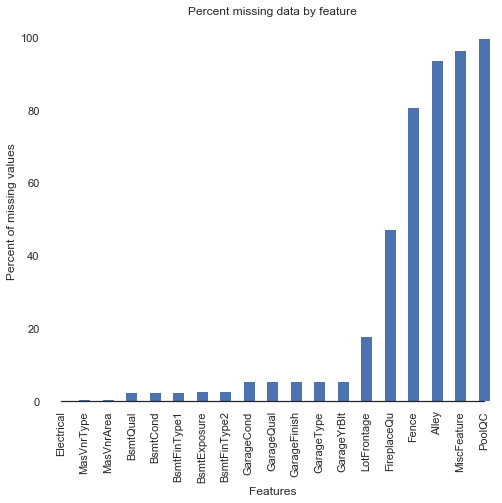

In [89]:
# visualising missing values
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
sns.set_color_codes(palette='deep')
missing = round(train.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

These visualisation helps determine which values need to be imputed, We impute them by proceeding sequentially through features with missing values.

In [90]:
# Some of the non-numeric predictors are stored as numbers; we convert them into strings 
features['MSSubClass'] = features['MSSubClass'].apply(str)
features['YrSold'] = features['YrSold'].astype(str)
features['MoSold'] = features['MoSold'].astype(str)

# data description says NA means typical
features['Functional'] = features['Functional'].fillna('Typ')
# has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
features['Electrical'] = features['Electrical'].fillna("SBrkr")
#  Only one NA value, We set 'TA' (which is the most frequent) for the missing value in KitchenQual
features['KitchenQual'] = features['KitchenQual'].fillna("TA")

# Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
# Fill in again with most frequent
features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])

# data description says NA means "No Pool", majority of houses have no Pool at all in general.
features["PoolQC"] = features["PoolQC"].fillna("None")

# Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    features[col] = features[col].fillna(0)
# Replacing missing data with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    features[col] = features[col].fillna('None')
# For all these categorical basement-related features, NaN means that there is no basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    features[col] = features[col].fillna('None')

# 'RL' is by far the most common value. So we can fill in missing values with 'RL'
features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

# group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
print('Features size:', features.shape)

Features size: (2917, 79)


In [91]:
# Filling the rest of the categorical features
objects = []
for i in features.columns:
    if features[i].dtype == object:
        objects.append(i)
features.update(features[objects].fillna('None'))

In [92]:
# Filling in the rest of the NA's
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics.append(i)
features.update(features[numerics].fillna(0))


After imputing features with missing values, is there any remaining missing values?

In [96]:
# Check the state of missing values
missing = percent_missing(features)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:10]

Percent of missing data


[('MSSubClass', 0.0),
 ('MSZoning', 0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('Street', 0.0),
 ('Alley', 0.0),
 ('LotShape', 0.0),
 ('LandContour', 0.0),
 ('Utilities', 0.0),
 ('LotConfig', 0.0)]

>  No more missing values

#### Add new features

Since area related features are very important to determine house prices, we add a few more features which is the total area of floors, bathrooms and porch area of each house before we continue droping these numeric colum

In [97]:
# Calculating totals before droping less significant columns

#  Adding total sqfootage feature 
features['TotalSF']=features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']
features['YrBltAndRemod']=features['YearBuilt']+features['YearRemodAdd']
features['Surface'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +
                                 features['1stFlrSF'] + features['2ndFlrSF'])
#  Adding total bathrooms feature
features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) +
                               features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))
#  Adding total porch sqfootage feature
features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                              features['EnclosedPorch'] + features['ScreenPorch'] +
                              features['WoodDeckSF'])


In [98]:
features['haspool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
features['has2ndfloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasgarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
features['hasbsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasfireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

#### Dealing with string values

On one hand, if you haven't noticed already, some features present string values. On the other hand, linear regression and calculations that we make on the data can only be done on numerical values. Therefore, having string values is a problem that we have to deal with. 

Fortunately, Pandas library provide 'get_dummies' method that transforms n features containing string values into m features, m being greater than n.

Example: If feature X has "A", "B" and "C" possible string values. The method 'get_dummies' will generate 3 features X_A, X_B and X_C having binary values. If a house Y used to have value "A" for feature X, house Y will now have 1 for X_A and 0 for X_B and X_C. As simple as that.

<table>
    <tr>
        <td> <div> Id </div> </td>
        <td> <div> FeatureX </div> </td>
    </tr>
    <tr>
        <td> <div> 1 </div> </td>
        <td> <div> "A" </div> </td>
    </tr>
    <tr>
        <td> <div> 2 </div> </td>
        <td> <div> "B" </div> </td>
    </tr>
    <tr>
        <td> <div> 3 </div> </td>
        <td> <div> "C" </div> </td>
    </tr>
</table>

becomes

<table>
    <tr>
        <td> <div> Id </div> </td>
        <td> <div> FeatureX_A </div> </td>
        <td> <div> FeatureX_B </div> </td>
        <td> <div> FeatureX_C </div> </td>
    </tr>
    <tr>
        <td> <div> 1 </div> </td>
        <td> <div> 1 </div> </td>
        <td> <div> 0 </div> </td>
        <td> <div> 0 </div> </td>
    </tr>
    <tr>
        <td> <div> 2 </div> </td>
        <td> <div> 0 </div> </td>
        <td> <div> 1 </div> </td>
        <td> <div> 0 </div> </td>
    </tr>
    <tr>
        <td> <div> 3 </div> </td>
        <td> <div> 0 </div> </td>
        <td> <div> 0 </div> </td>
        <td> <div> 1 </div> </td>
    </tr>
</table>

In [99]:
# Encoding the finalized features
final_features = pd.get_dummies(features).reset_index(drop=True)
print('Features size:', features.shape)
final_features.head()

Features size: (2917, 89)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [100]:
# Spliting the data back to train(X,y) and test(X_sub)
X = final_features.iloc[:len(y), :]
X_test = final_features.iloc[len(X):, :]
print('Features size for train(X,y) and test(X_test):')
print('X', X.shape, 'y', y.shape, 'X_test', X_test.shape)

Features size for train(X,y) and test(X_test):
X (1458, 342) y (1458,) X_test (1459, 342)


#### Dealing with outliers

What is an outlier? In statistics, an outlier is an observation point that is distant from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. (Wikipedia)

In short, an outlier is a data point that is significantly different from other data points in a data set. It can cause serious problems in statistical analysis. And in the end, detecting and handling outliers is often a somewhat subjective exercise.

We will use the 'percentile' numpy method in order to get the first quartile and the third quartile. We will later on calculate the iqr a.k.a the interquartile range to remove all the values that are greater than the upper bound or smaller than the lower bound.

In [52]:
# Removes outliers 
outliers = [30, 88, 462, 631, 1322]
print(X.index[outliers])
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])

Int64Index([31, 90, 465, 635, 1327], dtype='int64')


In [105]:
overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99.94:
        overfit.append(i)

overfit = list(overfit)
X = X.drop(overfit, axis=1)
X_test = X_test.drop(overfit, axis=1)

Separating the training(X,y) and the testing(X_sub) set

In [113]:
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

clf = IsolationForest(max_samples = 100, random_state = rng)
clf.fit(X)

# predictions
y_pred_train = clf.predict(X)
#y_pred_test = clf.predict(X_test)
#y_pred_outliers = clf.predict(X_outliers)

C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [50]:
X.to_csv("X.csv")

In [51]:
X_test.to_csv("Y.csv")